#  Dataset: House Prices - Advanced Regression Techniques

--- jhonnatan camacho 

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [1]:
import pandas as pd

data = {
    "Id": [1461, 1462, 1463],
    "SalePrice": [169277.0524984, 187758.393988768, 183583.683569555]
}


df = pd.DataFrame(data)


df.to_csv("predicciones.csv", index=False)

print("Archivo 'predicciones.csv' generado con éxito ✅")


Archivo 'predicciones.csv' generado con éxito ✅


# 🏠 Taller Semana 6 - Predicción de Precios de Vivienda

Este proyecto utiliza el dataset **House Prices - Advanced Regression Techniques** de Kaggle.  
El objetivo es predecir el precio de venta de una casa en Ames (Iowa, EE.UU.) a partir de sus características estructurales, de ubicación y calidad.

El proceso incluye:
1. Exploración y limpieza de datos.  
2. Selección de variables más relevantes.  
3. Construcción de un modelo de **Regresión Lineal Múltiple**.  
4. Evaluación y generación de predicciones finales.


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

print("Datos cargados correctamente")
print(f"Train shape: {X.shape}, Test shape: {test.shape}")

Datos cargados correctamente
Train shape: (1460, 80), Test shape: (1459, 80)


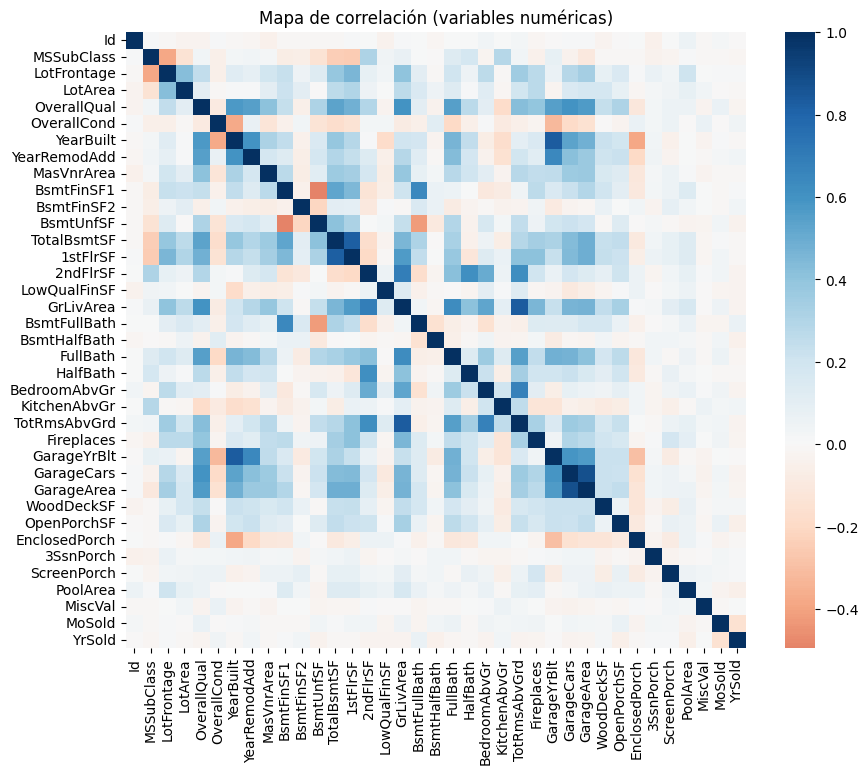

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.select_dtypes("number").corr(), cmap="RdBu", center=0)
plt.title("Mapa de correlación (variables numéricas)")
plt.show()


missing = X.isnull().sum()
drop_cols = missing[missing > 0.25 * len(X)].index
X = X.drop(columns=drop_cols)
test = test.drop(columns=drop_cols, errors="ignore")


In [8]:
print("Informacion Dataset")
print("=" * 50)
print(X.info())  

print("\nEstadisticas (numéricas)")
print("=" * 50)
print(X.describe().round(2))

print("\nColumnas con más valores N (train):")
print("=" * 50)
print(X.isnull().sum().sort_values(ascending=False).head())

print("\nColumnas con más valores N (test):")
print("=" * 50)
print(test.isnull().sum().sort_values(ascending=False).head())

print("\nDimensiones del dataset:")
print(f"Train: {X.shape}, Test: {test.shape}")


Informacion Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   i

In [9]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

X[num_cols] = X[num_cols].apply(lambda col: col.fillna(col.median()))
test[num_cols] = test[num_cols].apply(lambda col: col.fillna(col.median()))

X[cat_cols] = X[cat_cols].fillna("Desconocido")
test[cat_cols] = test[cat_cols].fillna("Desconocido")

X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

X, test = X.align(test, join="left", axis=1, fill_value=0)

print("Limpieza y codificación completadas")
print(f"Columnas finales: {X.shape[1]}")


Limpieza y codificación completadas
Columnas finales: 240


In [11]:
mask = X["GrLivArea"] < 4000
X = X[mask]
y = y[mask]


X["TotalSF"] = X.get("TotalBsmtSF", 0) + X.get("1stFlrSF", 0) + X.get("2ndFlrSF", 0)
X["EdadCasa"] = X["YrSold"] - X["YearBuilt"]
X["EdadRemodel"] = X["YrSold"] - X["YearRemodAdd"]
X["TieneGaraje"] = (X["GarageArea"] > 0).astype(int)


test["TotalSF"] = test.get("TotalBsmtSF", 0) + test.get("1stFlrSF", 0) + test.get("2ndFlrSF", 0)
test["EdadCasa"] = test["YrSold"] - test["YearBuilt"]
test["EdadRemodel"] = test["YrSold"] - test["YearRemodAdd"]
test["TieneGaraje"] = (test["GarageArea"] > 0).astype(int)


y_log = np.log1p(y)

print("Nuevas variables creadas  y outliers removidos .")

Nuevas variables creadas  y outliers removidos .


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

selector = SelectKBest(score_func=f_regression, k=200)
X_sel = selector.fit_transform(X_scaled, y_log)
test_sel = selector.transform(test_scaled)

cols_sel = X.columns[selector.get_support()]
print(f"Se seleccionaron {len(cols_sel)} variables .")

Se seleccionaron 200 variables .


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_sel, y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
cv = cross_val_score(model, X_sel, y_log, cv=5, scoring="r2")

print(f"RMSE: {rmse:.2f}")
print(f"R² promedio: {cv.mean():.4f}")

RMSE: 0.13
R² promedio: 0.9066


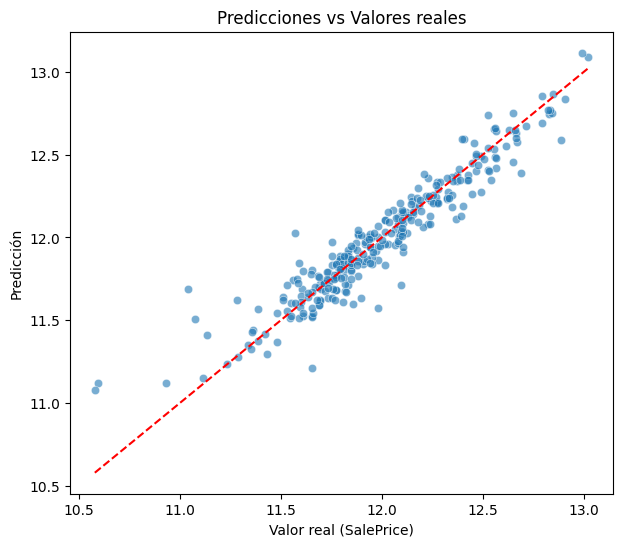

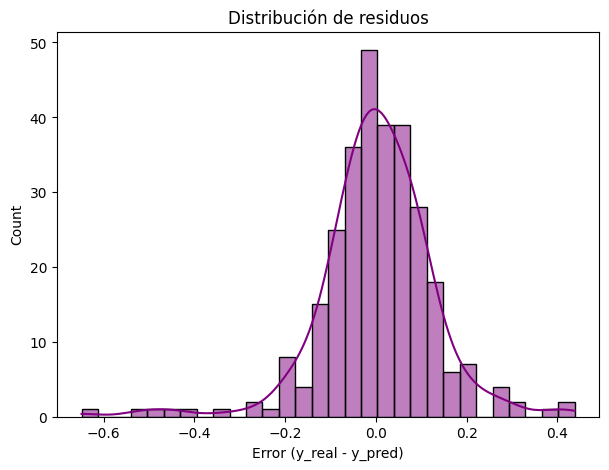

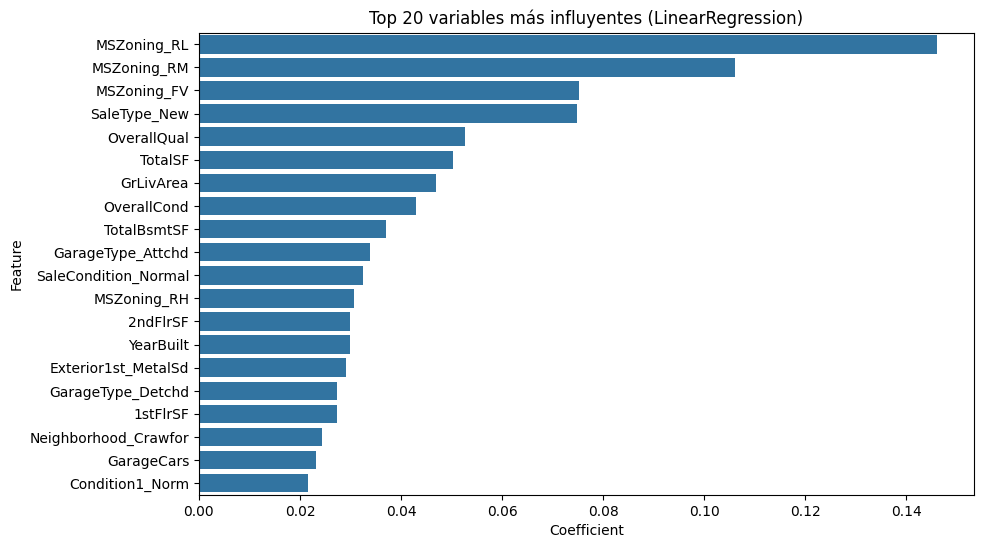

In [15]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.6)
plt.xlabel("Valor real (SalePrice)")
plt.ylabel("Predicción")
plt.title("Predicciones vs Valores reales")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.show()


residuos = y_valid - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuos, bins=30, kde=True, color="purple")
plt.title("Distribución de residuos")
plt.xlabel("Error (y_real - y_pred)")
plt.show()


coef_df = pd.DataFrame({
    "Feature": cols_sel,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(20))
plt.title("Top 20 variables más influyentes (LinearRegression)")
plt.show()


In [16]:
y_test_pred = np.expm1(model.predict(test_sel))  

output = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred
})

output.to_csv("predicciones.csv", index=False)
print("Archivo 'predicciones.csv' generado con éxito")

Archivo 'predicciones.csv' generado con éxito
